In [53]:
# PROMPT: write a sagemath code that will take a list of at least k items and randomly choose k of those items
import random

def choose_k_random_items(items, k):
    # Ensure that the list has at least k items
    if len(items) < k:
        raise ValueError("The list must have at least k items")
    
    # Randomly choose k items from the list
    chosen_items = random.sample(items, k)
    return chosen_items

# # Example usage:
# items = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # List with at least k items
# k = 3  # Number of items to randomly select
# result = choose_k_random_items(items, k)
# print(f"Randomly chosen {k} items: {result}")






# setup:
# branches numbered 0 to k-1
# center vertex is the 0th vertex for all branches
# config = [ branch=[ vertex=[chips] ] ]
# ex if branch 1 vertex 2 has chip 7, 7 in config[1][2] == True
def setStar(k,m):
    config = []
    central = []
    for chip in range(1,k*m+1):
        central.append(chip)
    for branch in range(k):
        branch_list = []
        for vertex in range(m+2):
            branch_list.append([])
        branch_list[0]=central
        config.append(branch_list)
    return config

# test:
# three_star = setStar(3,2)
# print(f"three_star: {three_star}")
# if three_star == [[[1,2,3,4,5,6],[],[],[]],[[1,2,3,4,5,6],[],[],[]],[[1,2,3,4,5,6],[],[],[]]]:
#     print("Test works")



# to fire the center:
# if config[0][0] has at least k chips
# choose k chips
# send the smallest to config[0][1], next smallest to config[1][1], etc
# remove those k chips from config[b][0] for all b in [0,k-1]
def fireCentral(og_config):
    config = copy.deepcopy(og_config)
    k = len(config)
    if len(config[0][0]) >= k:
        chipsFired = choose_k_random_items(config[0][0], k)
        # print(f"firing chips {chipsFired}")
        for chip in chipsFired:
            config[0][0].remove(chip)
        for i in range(k):
            chip = min(chipsFired)
            config[i][1].append(chip)
            chipsFired.remove(chip)
        return config
    else:
        return None

# test
# new_config = fireCentral(three_star)
# print(f"new_config: {new_config}")
# newest_config = fireCentral(new_config)
# print(f"newest_config: {newest_config}")



# to fire vertex v of branch b (b in [0,k-1], v>=1):
# if config[b][v] has at least 2 chips
# choose two of those chips
# send the smaller to config[b][v-1] and the larger to config[b][v+1]
# remove those 2 chips from config[b][v]
def fireBranch(og_config,b,v):
    config = copy.deepcopy(og_config)
    if len(config[b][v]) >= 2:
        chipsFired = choose_k_random_items(config[b][v], 2)
        config[b][v-1].append(min(chipsFired))
        config[b][v+1].append(max(chipsFired))
        config[b][v].remove(min(chipsFired))
        config[b][v].remove(max(chipsFired))
        return config
    else:
        return None

# test
# newester_config = fireBranch(newest_config,1,1)
# print(f"newester_config: {newester_config}")


# # get firable vertices and fire a random one
# def fireRandom(og_config):
#     config = copy.deepcopy(og_config)
#     k = len(config)
#     l = len(config[0])
#     firable = []
#     if fireCentral(config) is not None:
#         firable.append([0,0])
#     for b in range(k):
#         for v in range(1,l):
#             if fireBranch(config,b,v) is not None:
#                 firable.append([b,v])
#     # print(f"firable: {firable}")
#     if firable is not None:
#         firing = random.sample(firable, 1)[0]
#         # print(f"firing (b,v): {firing}")
#         if firing[1] == 0:
#             output = fireCentral(config)
#             return output
#         else:
#             # print(f"firing {config} at branch {firing[0]} vertex {firing[1]}")
#             output = fireBranch(config,firing[0],firing[1])
#             return output
#     else:
#         return None

# test
# print(f"random fire: {fireRandom(newester_config)}")



# get firable vertices and fire a random one
def getFirable(og_config):
    config = copy.deepcopy(og_config)
    k = len(config)
    l = len(config[0])
    firable = []
    if fireCentral(config) is not None:
        firable.append([0,0])
    for b in range(k):
        for v in range(1,l):
            if fireBranch(config,b,v) is not None:
                firable.append([b,v])
    # print(f"firable: {firable}")
    return firable

def fireRandom(og_config):
    config = copy.deepcopy(og_config)
    firable = getFirable(config)
    if firable != []:
        firing = random.sample(firable, 1)[0]
        # print(f"firing (b,v): {firing}")
        if firing[1] == 0:
            output = fireCentral(config)
            return output
        else:
            # print(f"firing {config} at branch {firing[0]} vertex {firing[1]}")
            output = fireBranch(config,firing[0],firing[1])
            return output
    else:
        return None

# test
# print(f"random fire: {fireRandom(newester_config)}")




# to play the game:
# initialize k branches of length m+2 (including center) and n=km chips at the central vertex
# fire a random vertex
# repeat until nothing can fire
# when nothing can fire:
    # print final configuration
def playGame(k,m):
    config = setStar(k,m)
    fireAgain = True
    current = config
    while fireAgain == True:
        fireAgain = False
        output = fireRandom(current)
        # print(f"fired to: {output}")
        if output is not None:
            fireAgain = True
            current = output
        else:
            fireAgain = False
            print(f"Central vertex: {current[0][0]}")
            for b in range(k):
                current[b].pop(0)
            for b in range(k):
                print(f"Branch {b}: {current[b]}")
    return current

In [91]:
# examples
playGame(3,2)
print(" ")
playGame(3,3)
print(" ")
playGame(4,2)
print(" ")
playGame(4,3)
print(" ")
playGame(2,3)
print(" ")

Central vertex: []
Branch 0: [[1], [2], []]
Branch 1: [[3], [4], []]
Branch 2: [[5], [6], []]
 
Central vertex: []
Branch 0: [[1], [2], [3], []]
Branch 1: [[4], [5], [6], []]
Branch 2: [[7], [8], [9], []]
 
Central vertex: []
Branch 0: [[1], [2], []]
Branch 1: [[3], [4], []]
Branch 2: [[5], [6], []]
Branch 3: [[7], [8], []]
 
Central vertex: []
Branch 0: [[1], [3], [4], []]
Branch 1: [[2], [6], [7], []]
Branch 2: [[5], [9], [11], []]
Branch 3: [[8], [10], [12], []]
 
Central vertex: []
Branch 0: [[1], [2], [3], []]
Branch 1: [[4], [5], [6], []]
 


In [110]:
# Versions of the functions from above but that fire specific chips instead of randomized (for building the poset)

def fireCentralSp(og_config,og_chips):
    config = copy.deepcopy(og_config)
    chipsFired = copy.deepcopy(og_chips)
    # print(f"chipsFired: {chipsFired}")
    k = len(config)
    if len(config[0][0]) >= k:
        for chip in chipsFired:
            # print(f"removing chip {chip} from config[0][0] {config[0][0]}")
            config[0][0].remove(chip)
        for i in range(k):
            chip = min(chipsFired)
            config[i][1].append(chip)
            chipsFired.remove(chip)
        return config
    else:
        return None

def fireBranchSp(og_config,b,v,og_chips):
    config = copy.deepcopy(og_config)
    chipsFired = copy.deepcopy(og_chips)
    if len(config[b][v]) >= 2:
        config[b][v-1].append(min(chipsFired))
        config[b][v+1].append(max(chipsFired))
        config[b][v].remove(min(chipsFired))
        config[b][v].remove(max(chipsFired))
        return config
    else:
        return None

##########
# PROMPT: write a program that can take a list of lists of lists and a number k, and for each subsublist return each possible subset of k elements
# PROMPT: change it so that the function outputs all of the k-tuples all in one list
# PROMPT: change it so it takes in a list of lists instead of a list of lists of lists

import itertools

def subsets_of_k(nested_list, k):
    all_subsets = []
    
    # Iterate through each sublist in the list of lists
    for sublist in nested_list:
        # Generate all combinations of k elements from the sublist
        if len(sublist) >= k:
            subsets = list(itertools.combinations(sublist, k))
            all_subsets.extend(subsets)  # Flatten all combinations into one list
    
    return all_subsets

# # Example usage:
# nested_list = [
#     [1, 2, 3],
#     [4, 6],
#     [7, 8, 9]
# ]
# k = 3  # Size of the subset
# result = subsets_of_k(nested_list, k)

# # Print all k-tuples in one list
# print("All k-tuples:", result)

# PROMPT: write a program that returns all pairs of elements in a list
def all_pairs(lst):
    pairs = []
    # Iterate over the list with two indices to create pairs
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):  # j starts from i + 1 to avoid duplicates
            pairs.append((lst[i], lst[j]))
    return pairs

# # Example usage:
# lst = [1, 2, 3, 4]
# result = all_pairs(lst)
# print("All pairs:", result)

# PROMPT: write a program that returns all tuples in a list of length k

import itertools

def all_tuples(lst, k):
    # Generate all combinations of length k
    return list(itertools.combinations(lst, k))

# # Example usage:
# lst = [1, 2, 3, 4]
# k = 2  # Length of the tuple
# result = all_tuples(lst, k)
# print("All tuples:", result)

#########

def getFirableSp(og_config):
    config = copy.deepcopy(og_config)
    # print(f"config: {config}")
    k = len(config)
    l = len(config[0])
    firable = []
    firable_at_zero = all_tuples(config[0][0],k) # I think solved problem: "worked" when this was subsets_of_k and config[0] but that isn't right; we don't want all the k-tuples on branch 0 we want all the k-tuples on vertex 0 
    # print(f"firable at zero: {firable_at_zero}")
    for ktup in firable_at_zero:
        # print(f"firing {ktup}")
        if fireCentralSp(config,list(ktup)) is not None:
            firable.append([0,0,list(ktup)])
    for b in range(k):
        for v in range(1,l):
            firable_on_branch = all_pairs(config[b][v])
            for pair in firable_on_branch:
                if fireBranchSp(config,b,v,list(pair)) is not None:
                    firable.append([b,v,list(pair)])
    # print(f"firable: {firable}")
    return firable

# # test
# config = setStar(3,2)
# print(getFirableSp(config))
# new_config = fireCentralSp(config,[2,3,4])
# print(new_config)
# newer_config = fireCentralSp(new_config,[1,5,6])
# print(newer_config)
# newest_config = fireBranchSp(newer_config,1,1,[3,5])
# print(newest_config)

Vertex 0: [[[1, 2, 3, 4], [], [], []], [[1, 2, 3, 4], [], [], []]]
Vertex 1: [[[3, 4], [1], [], []], [[3, 4], [2], [], []]]
Vertex 2: [[[2, 4], [1], [], []], [[2, 4], [3], [], []]]
Vertex 3: [[[2, 3], [1], [], []], [[2, 3], [4], [], []]]
Vertex 4: [[[1, 4], [2], [], []], [[1, 4], [3], [], []]]
Vertex 5: [[[1, 3], [2], [], []], [[1, 3], [4], [], []]]
Vertex 6: [[[1, 2], [3], [], []], [[1, 2], [4], [], []]]
Vertex 7: [[[], [1, 3], [], []], [[], [2, 4], [], []]]
Vertex 8: [[[], [1, 2], [], []], [[], [3, 4], [], []]]
Vertex 9: [[[], [1, 2], [], []], [[], [4, 3], [], []]]
Vertex 10: [[[], [2, 1], [], []], [[], [3, 4], [], []]]
Vertex 11: [[[], [2, 1], [], []], [[], [4, 3], [], []]]
Vertex 12: [[[], [3, 1], [], []], [[], [4, 2], [], []]]
Vertex 13: [[[1], [], [3], []], [[1], [2, 4], [], []]]
Vertex 14: [[[2], [1, 3], [], []], [[2], [], [4], []]]
Vertex 15: [[[1], [], [2], []], [[1], [3, 4], [], []]]
Vertex 16: [[[3], [1, 2], [], []], [[3], [], [4], []]]
Vertex 17: [[[1], [], [2], []], [[1], 

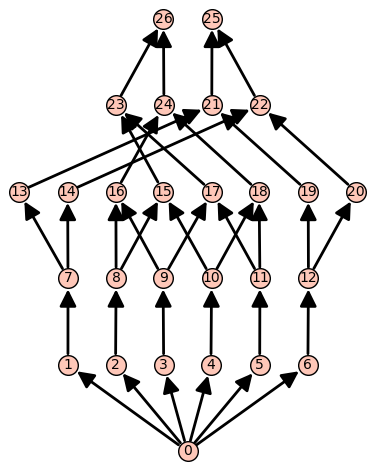

rank: 5
{26: 8, 25: 4}


In [121]:
# PROMPT: write a function that will take in a list of lists called inConfig, and then use the function you wrote called find_pairs to find all the pairs of numbers that appear in the same sublist. Then, for each pair, use the function you wrote called move_numbers_in_vectors with inputs inConfig and the pair of numbers to get a new list for each pair. Record all of these lists in a list called reachableConfigs. Then, repeat this process to each of the new lists, and continue until none of the new lists have any pairs of numbers that appear in the same sublist. Then output "Done"

# Modified after generation, then modified again for the star

def generate_reachable_configs(config):
    reachableConfigs = [config]  # Start with the original config in the list
    new_configs_found = True

    while new_configs_found:
        new_configs_found = False  # Assume no new configs found unless proven otherwise

        # Loop through each configuration in reachableConfigs
        for current_config in reachableConfigs[:]:  # Use a slice to avoid modifying list while iterating
            # print(f"configuration: {current_config}")
            # Get all firable branch/vertex/chip from the current configuration using getFirable
            firable = getFirableSp(current_config)
            # print(f"firable: {firable}")

            # Check each firable branch/vertex/chip
            for triple in firable:
                # print(f"triple: {triple}")
                if triple[1] == 0:
                    # print(f"firing central vertex of {current_config}")
                    # Apply fireCentralSp to get a new configuration
                    new_config = fireCentralSp(current_config,triple[2])
                    # print(f"result: {new_config}")
    
                    # If new_config is valid and not already in reachableConfigs, add it
                    if new_config is not None and new_config not in reachableConfigs:
                        reachableConfigs.append(new_config)
                        new_configs_found = True  # We found a new config, so continue the loop
                else:
                    # print(f"firing branch {triple[0]}")
                    # Apply fireBranchSp to get a new configuration
                    new_config = fireBranchSp(current_config,triple[0],triple[1],triple[2]) # og_config,b,v,og_chips
                    # print(f"result: {new_config}")
                    
                    # If new_config is valid and not already in reachableConfigs, add it
                    if new_config is not None and new_config not in reachableConfigs:
                        reachableConfigs.append(new_config)
                        new_configs_found = True  # We found a new config, so continue the loop

        # Stop when no new configurations were added in the last round
    return reachableConfigs


# test
config = setStar(2,3)
generate_reachable_configs(config)
    

# PROMPT: I want to write a function using the code from my last message to write a function that will take two inputs called config and enn, run generate_reachable_configs on config to get a list called reachableConfigs, and then create a list of tuples of the form (i,j) where i and j are indices of items in reachableConfigs such that reachableConfigs[j] is the result of running fireIJ(reachableConfigs[i],k,l) where k and l are any two positive integers less than or equal to enn but not equal to each other

# Modified after generation and again to be suitable for the star

def genEdges(config):
# get all the reachable configurations from config
    reachableConfigs = generate_reachable_configs(config)
# get the number of reachable configurations
    numVertices = len(reachableConfigs)
    edges = []
# for every pair of reachable configurations (i and j) and every two pairs of chips (ess and tee),
# check if configuration j is equal to configuration i but with chips ess and tee fired
    for i in range(numVertices):
        reached = reachableConfigs[i]
        # print(f"reached: {reached}")
        check_firings = getFirableSp(reached)
        # print(f"check_firings: {check_firings}")
        for firable in check_firings:
            # print(f"firable: {firable}")
            if firable[1] == 0:
                firedConfig = fireCentralSp(reached,firable[2])
            else:
                firedConfig = fireBranchSp(reached,firable[0],firable[1],firable[2])
            if firedConfig in reachableConfigs and [i,reachableConfigs.index(firedConfig)] not in edges:
                edges.append([i,reachableConfigs.index(firedConfig)])
            else:
                pass
    return edges

# test
config = setStar(2,2)
reachables = generate_reachable_configs(config)
edges = genEdges(config)
digraph = DiGraph(edges)
for v in digraph.vertices():
    print(f"Vertex {v}: {reachables[v]}")
poset = Poset(digraph)
poset.show()

rnk = poset.rank()
max_elts = poset.maximal_elements()
max_elts_ct = {}
for elt in max_elts:
    max_elts_ct[elt] = 0
for chain in poset.maximal_chains():
    for elt in max_elts:
        if chain[rnk] == elt:
            max_elts_ct[elt] += 1
print(f"rank: {rnk}")
print(max_elts_ct)

Vertex 0: [[[1, 2, 3, 4, 5, 6], [], [], []], [[1, 2, 3, 4, 5, 6], [], [], []], [[1, 2, 3, 4, 5, 6], [], [], []]]
Vertex 1: [[[4, 5, 6], [1], [], []], [[4, 5, 6], [2], [], []], [[4, 5, 6], [3], [], []]]
Vertex 2: [[[3, 5, 6], [1], [], []], [[3, 5, 6], [2], [], []], [[3, 5, 6], [4], [], []]]
Vertex 3: [[[3, 4, 6], [1], [], []], [[3, 4, 6], [2], [], []], [[3, 4, 6], [5], [], []]]
Vertex 4: [[[3, 4, 5], [1], [], []], [[3, 4, 5], [2], [], []], [[3, 4, 5], [6], [], []]]
Vertex 5: [[[2, 5, 6], [1], [], []], [[2, 5, 6], [3], [], []], [[2, 5, 6], [4], [], []]]
Vertex 6: [[[2, 4, 6], [1], [], []], [[2, 4, 6], [3], [], []], [[2, 4, 6], [5], [], []]]
Vertex 7: [[[2, 4, 5], [1], [], []], [[2, 4, 5], [3], [], []], [[2, 4, 5], [6], [], []]]
Vertex 8: [[[2, 3, 6], [1], [], []], [[2, 3, 6], [4], [], []], [[2, 3, 6], [5], [], []]]
Vertex 9: [[[2, 3, 5], [1], [], []], [[2, 3, 5], [4], [], []], [[2, 3, 5], [6], [], []]]
Vertex 10: [[[2, 3, 4], [1], [], []], [[2, 3, 4], [5], [], []], [[2, 3, 4], [6], [], [

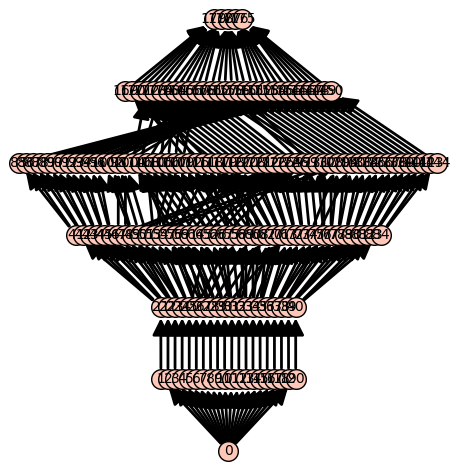

rank: 6
{179: 48, 178: 24, 177: 24, 176: 12, 175: 12}


In [120]:
# test
config = setStar(3,2)
reachables = generate_reachable_configs(config)
edges = genEdges(config)
digraph = DiGraph(edges)
for v in digraph.vertices():
    print(f"Vertex {v}: {reachables[v]}")
poset = Poset(digraph)
poset.show()

rnk = poset.rank()
max_elts = poset.maximal_elements()
max_elts_ct = {}
for elt in max_elts:
    max_elts_ct[elt] = 0
for chain in poset.maximal_chains():
    for elt in max_elts:
        if chain[rnk] == elt:
            max_elts_ct[elt] += 1
print(f"rank: {rnk}")
print(max_elts_ct)

In [122]:
config = setStar(2,3)
reachables = generate_reachable_configs(config)
edges = genEdges(config)
digraph = DiGraph(edges)
for v in digraph.vertices():
    print(f"Vertex {v}: {reachables[v]}")
poset = Poset(digraph)
# poset.show()
print(" ")

rnk = poset.rank()
max_elts = poset.maximal_elements()
max_elts_ct = {}
for elt in max_elts:
    max_elts_ct[elt] = 0
for chain in poset.maximal_chains():
    for elt in max_elts:
        if chain[rnk] == elt:
            max_elts_ct[elt] += 1
print(f"rank: {rnk}")
print(max_elts_ct)

Vertex 0: [[[1, 2, 3, 4, 5, 6], [], [], [], []], [[1, 2, 3, 4, 5, 6], [], [], [], []]]
Vertex 1: [[[3, 4, 5, 6], [1], [], [], []], [[3, 4, 5, 6], [2], [], [], []]]
Vertex 2: [[[2, 4, 5, 6], [1], [], [], []], [[2, 4, 5, 6], [3], [], [], []]]
Vertex 3: [[[2, 3, 5, 6], [1], [], [], []], [[2, 3, 5, 6], [4], [], [], []]]
Vertex 4: [[[2, 3, 4, 6], [1], [], [], []], [[2, 3, 4, 6], [5], [], [], []]]
Vertex 5: [[[2, 3, 4, 5], [1], [], [], []], [[2, 3, 4, 5], [6], [], [], []]]
Vertex 6: [[[1, 4, 5, 6], [2], [], [], []], [[1, 4, 5, 6], [3], [], [], []]]
Vertex 7: [[[1, 3, 5, 6], [2], [], [], []], [[1, 3, 5, 6], [4], [], [], []]]
Vertex 8: [[[1, 3, 4, 6], [2], [], [], []], [[1, 3, 4, 6], [5], [], [], []]]
Vertex 9: [[[1, 3, 4, 5], [2], [], [], []], [[1, 3, 4, 5], [6], [], [], []]]
Vertex 10: [[[1, 2, 5, 6], [3], [], [], []], [[1, 2, 5, 6], [4], [], [], []]]
Vertex 11: [[[1, 2, 4, 6], [3], [], [], []], [[1, 2, 4, 6], [5], [], [], []]]
Vertex 12: [[[1, 2, 4, 5], [3], [], [], []], [[1, 2, 4, 5], [6],